In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.9.2


### Creating data to view and fit

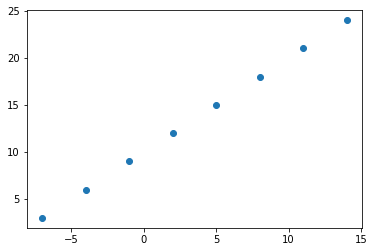

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

### Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [3]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

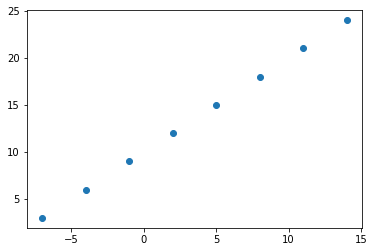

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [6]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [7]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

### Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[12.716021]], dtype=float32)

### Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

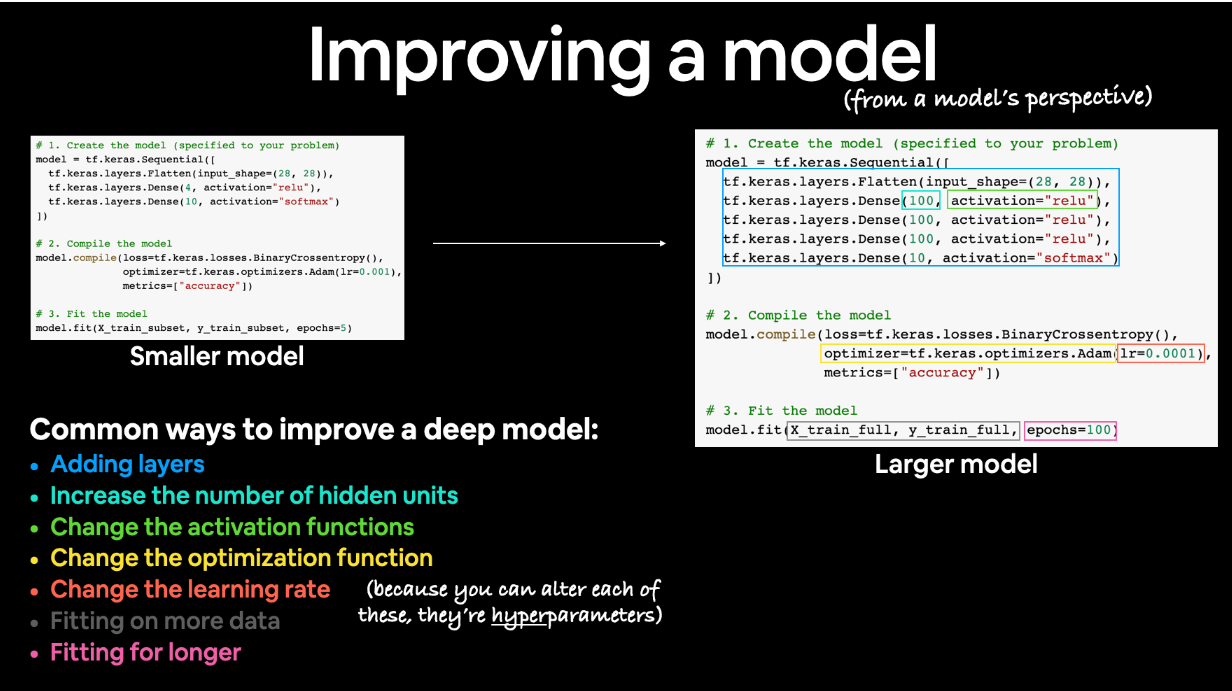

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 230ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 8

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

In [12]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 39ms/step


array([[30.158512]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

### Evaluating a model

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

#### Visualize, visualize, visualize

It's a good idea to visualize:

The data - what data are you working with? What does it look like?

The model itself - what does the architecture look like? What are the different shapes?

The training of a model - how does a model perform while it learns?

The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [14]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [15]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])


Since 
y
=
X
+
10
, we could make the labels like so:

In [ ]:
# Same result as above
y = X + 10
y

### Split data into training/test set

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [16]:
# Check how many samples we have
len(X)

50

In [17]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

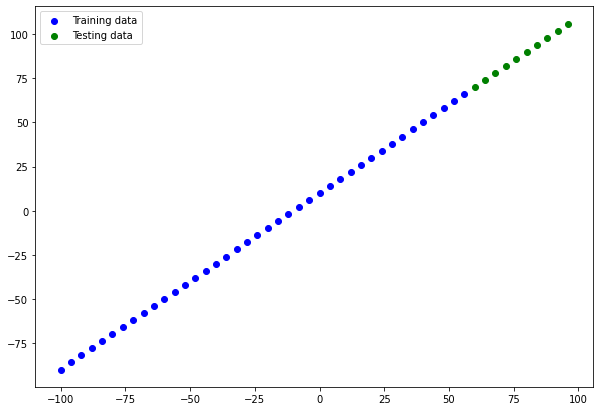

In [18]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

### Visualizing the model

In [20]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: ignored

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [22]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.

Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [23]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [24]:
# Check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


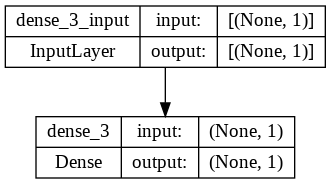

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing the predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [26]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


In [27]:
# View the predictions
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [28]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

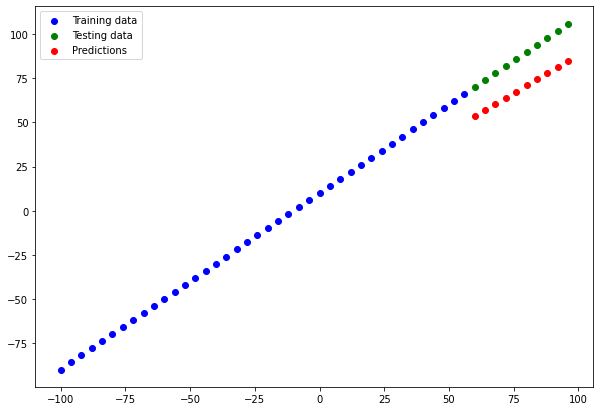

In [29]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions

Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.

Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [30]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 114ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [31]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [32]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [33]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [34]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [35]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [36]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [37]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [38]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [39]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.5734>

In [40]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

In [41]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).

Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

Train for longer - give your model more of a chance to find the patterns in the data.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

Build model_1

In [42]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 51ms/step


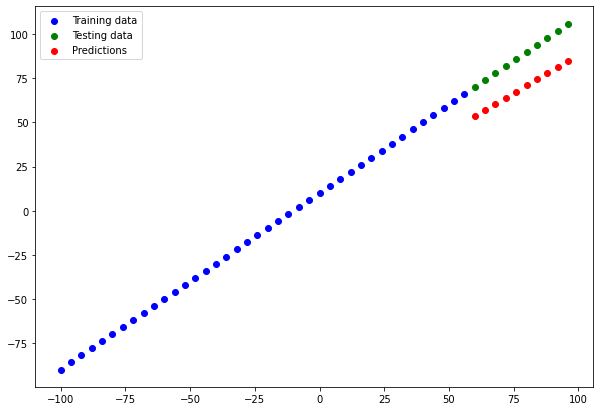

In [43]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [44]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.5734)

Build model_2

In [45]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 63ms/step


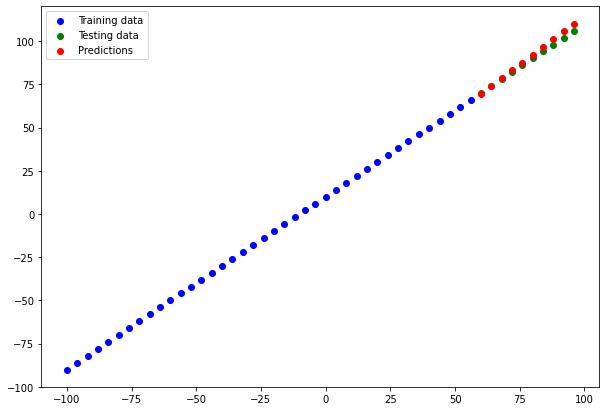

In [46]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [47]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098641, 5.4595404)

Build model_3

In [48]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 41ms/step


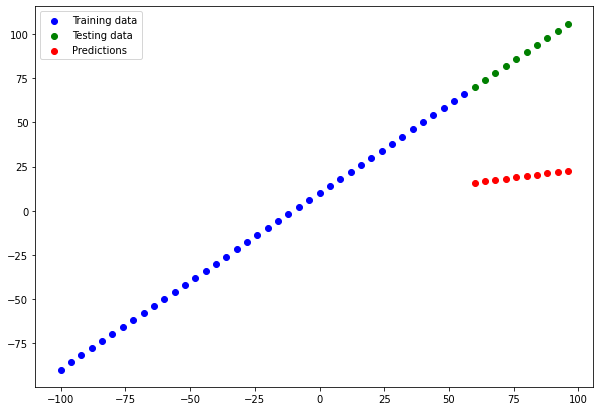

In [49]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [50]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.687874, 4804.4736)

In [51]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [52]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.909864,5.459540
2,model_3,68.687874,68.687874


### Tracking your experiments

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

### Saving a model

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The **SavedModel format (default)**.

The **HDF5 format**.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [53]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [54]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [55]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [56]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


### Loading a model

We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [57]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 39ms/step


True

Loading in from the HDF5 is much the same.

In [59]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 38ms/step


True

### Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

1. Right click on the file in the files pane and click 'download'.

2. Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

### A larger example

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

In [61]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [63]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [64]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [65]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [66]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0



And create training and test sets. We could do this manually, but to make it easier, we'll leverage the already available train_test_split function available from Scikit-Learn.

In [67]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

Now we can build and fit a model (we'll make it the same as model_2).

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7887.1597 - mae: 7887.1597
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7578.0840 - mae: 7578.0840
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7694.1348 - mae: 7694.1348
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.9121 - mae: 7595.9121
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7735.9106 - mae: 7735.9106

In [69]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.2344 - mae: 8628.2344


[8628.234375, 8628.234375]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

Increasing the number of layers (2 -> 3).

Increasing the number of units in each layer (except for the output layer).

Changing the optimizer (from SGD to Adam).

In [70]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [71]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

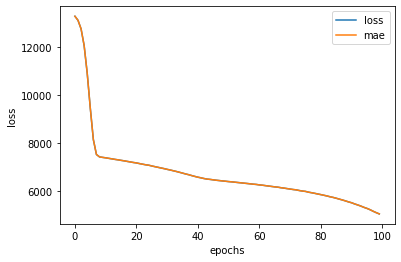

In [72]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

In [73]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [74]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 7ms/step - loss: 3495.8022 - mae: 3495.8022


(3495.80224609375, 3495.80224609375)

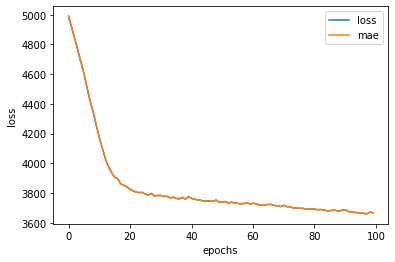

In [75]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable


Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

1. Turning all of your data to numbers (a neural network can't handle strings).
2. Making sure your data is in the right shape (verifying input and output shapes).
3. Feature scaling:

Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.

Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.

Which one should you use?

With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [77]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:

MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1)
.
OneHotEncoder - one hot encode the non-numerical columns.

In [78]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [79]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [80]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [81]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [82]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [83]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3171.5779 - mae: 3171.5779


In [84]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3495.80224609375, 3171.577880859375)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).

insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.